In [22]:
from droplet_growth import mic, poisson, register
from functools import partial
import tifffile as tf
import pandas as pd
from glob import glob
import re
import numpy as np
from multiprocessing import Pool
from aicsimageio import imread, imread_dask
import os
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


See http://localhost:8888/lab/tree/multiwell%20align%20count%20dec-jan%202022.ipynb for alignment and counting

In [11]:
counts_day1 = pd.concat(map(pd.read_csv, glob('E:Andrey/20220113-MIC-W8110_RFPplus-amp/day1/composites/*-counts.csv')), ignore_index=True)
counts_day1

label            x             y  n_cells  ng  poisson fit
0         1   663.248626    417.128241        3   0     1.410607
1         2   664.647675    948.961450        1   0     1.410607
2         3   665.043884   1475.729516        1   0     1.410607
3         4   661.226322  16298.040220        3   0     1.410607
4         5   660.757642  16826.050217        1   0     1.410607
...     ...          ...           ...      ...  ..          ...
4504    497  5962.000000   4646.000000        4  64     1.187753
4505    498  5961.897296   5177.702880        0  64     1.187753
4506    499  5961.526499   5706.998255        1  64     1.187753
4507    500  5961.537016   6236.971642        1  64     1.187753
4508    501  5961.585169   6765.801022        2  64     1.187753

[4509 rows x 6 columns]

In [12]:
counts_day1.ng.unique()

array([ 0,  2,  4,  8, 12, 16, 20, 32, 64], dtype=int64)

In [4]:
counts_day2 = pd.concat(map(pd.read_csv, glob('E:Andrey/20220113-MIC-W8110_RFPplus-amp/day2/composites/*-counts.csv')), ignore_index=True)
counts_day2

label            x             y  n_cells  ng  poisson fit
0         1   663.248626    417.128241        5   0     0.126037
1         2   664.647675    948.961450        1   0     0.126037
2         3   665.043884   1475.729516        0   0     0.126037
3         4   661.226322  16298.040220       82   0     0.126037
4         5   660.757642  16826.050217       20   0     0.126037
...     ...          ...           ...      ...  ..          ...
4504    497  5962.000000   4646.000000        0  64     0.024441
4505    498  5961.897296   5177.702880        0  64     0.024441
4506    499  5961.526499   5706.998255        0  64     0.024441
4507    500  5961.537016   6236.971642        0  64     0.024441
4508    501  5961.585169   6765.801022        0  64     0.024441

[4509 rows x 6 columns]

In [10]:
counts_day2.ng.unique()

array([ 0,  2,  4,  8, 12, 16, 20, 32, 64], dtype=int64)

In [8]:
counts_day1[['ng','label']]

ng  label
0      0      1
1      0      2
2      0      3
3      0      4
4      0      5
...   ..    ...
4003  64    497
4004  64    498
4005  64    499
4006  64    500
4007  64    501

[4008 rows x 2 columns]

In [14]:
np.testing.assert_array_equal(counts_day1[['ng','label']], counts_day2[['ng','label']], )

In [15]:
table = counts_day1.copy()

In [18]:
table.loc[:,'n24'] = counts_day2.n_cells
table.loc[:,'final_state'] = table.n24 > 10

In [30]:
table.to_csv('E:Andrey/20220113-MIC-W8110_RFPplus-amp/processing/table.csv', index=None)

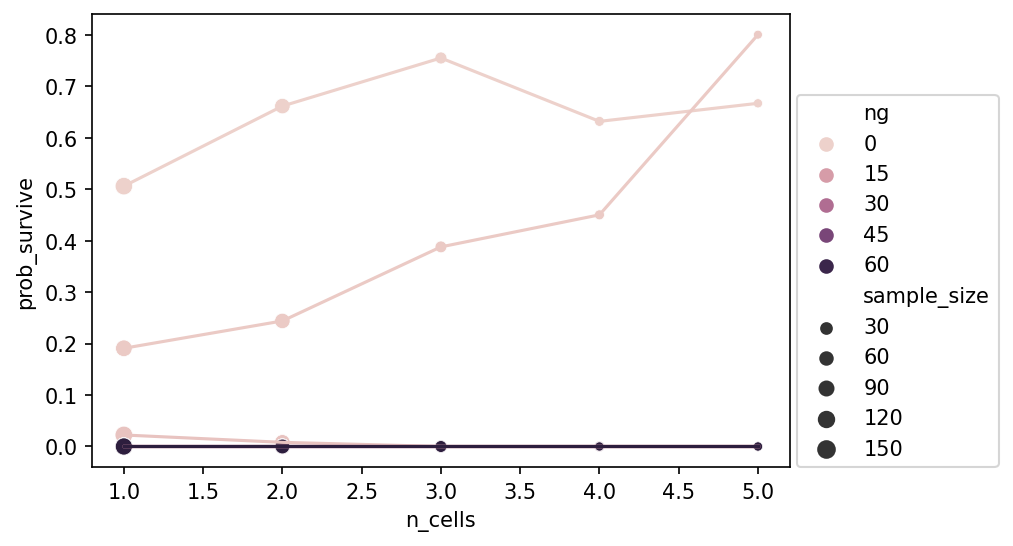

In [20]:
stats = mic.get_stats(table)

C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\seaborn\cate

<AxesSubplot:xlabel='ng', ylabel='n24'>

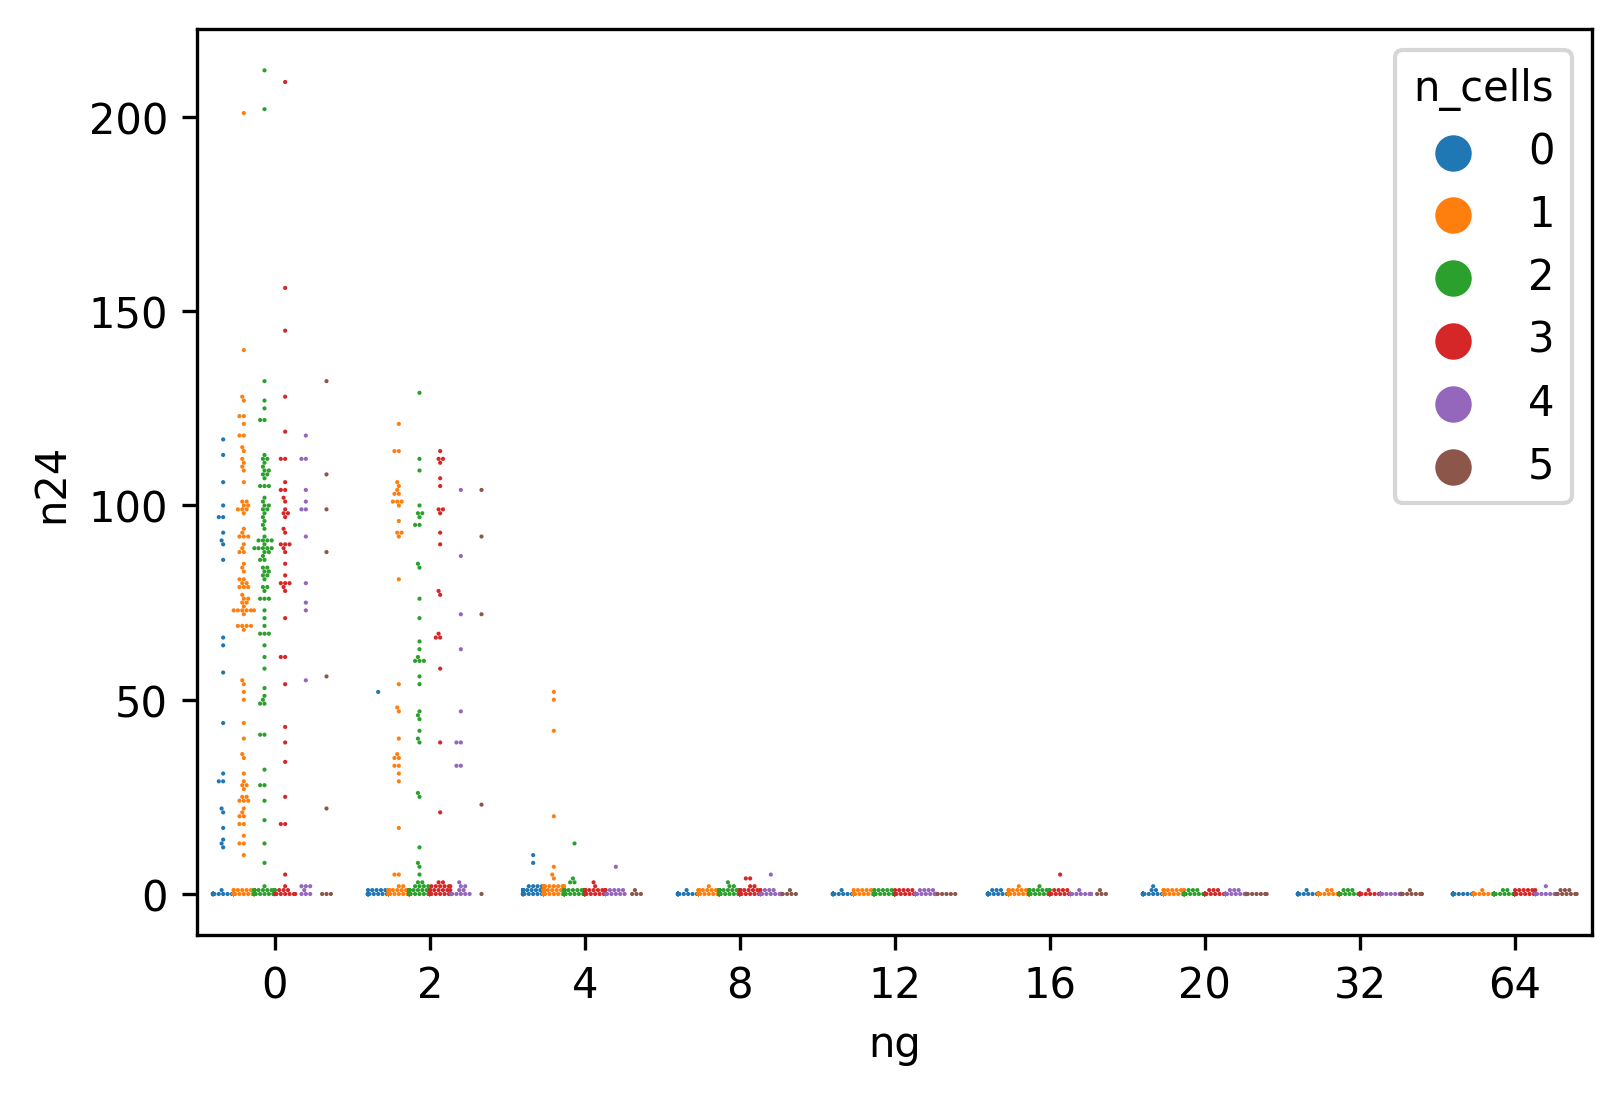

In [23]:
fig, ax = plt.subplots(dpi=300)
sns.swarmplot(ax=ax, data=table.query('n_cells < 6'), x='ng', y='n24', hue='n_cells', dodge=True, size=1)

In [25]:
fig, ax = plt.subplots(dpi=300)
sns.lineplot(ax=ax, data=table.query('0 < n_cells < 5 and ng<10'), x='ng', y='final_state', hue='n_cells')

<AxesSubplot:xlabel='ng', ylabel='final_state'>

C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


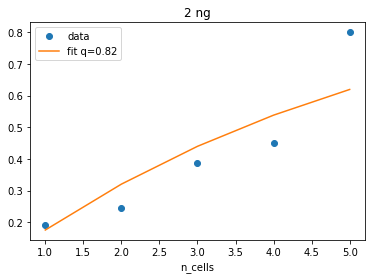

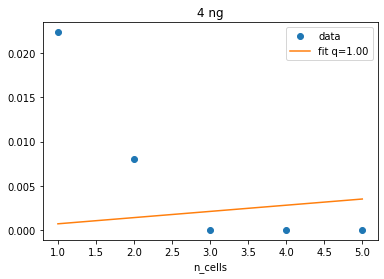

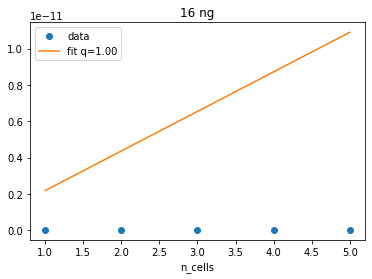

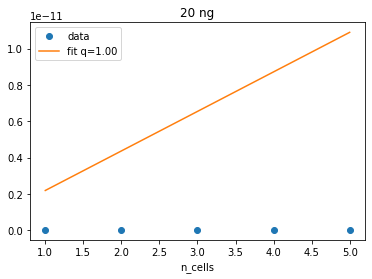

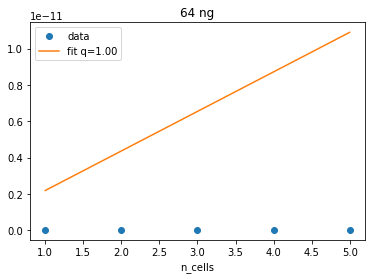

In [31]:
q1 = mic.fit.single_prob(stats, show_individual_fits=True)

In [32]:
q1.to_csv('E:Andrey/20220113-MIC-W8110_RFPplus-amp/processing/q1.csv', index=None)

In [35]:
stats.to_csv('E:Andrey/20220113-MIC-W8110_RFPplus-amp/processing/stats.csv', index=None)